In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import io

url='https://drive.google.com/file/d/1IjIEhLc9n8eLKeY-yh_YigKVWbhgGBsN/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

result_11 = df.loc[11::12, ['result', 'side', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5']]
result_10 = df.loc[10::12, ['result', 'side', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5']]

merged_result = pd.concat([result_10, result_11])

merged_result = merged_result.sort_index()
merged_result = merged_result.reset_index(level=None)

<ipython-input-2-ddab10ec9f19>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,index,result,side,pick1,pick2,pick3,pick4,pick5,ban1,ban2,ban3,ban4,ban5
0,10,0,Blue,Kalista,Senna,Orianna,Maokai,Aatrox,Akali,Nocturne,K'Sante,Lee Sin,Wukong
1,11,1,Red,Renata Glasc,Varus,LeBlanc,Rell,Rumble,Poppy,Ashe,Neeko,Vi,Jarvan IV
2,22,0,Blue,Neeko,Bel'Veth,Kennen,Senna,Tahm Kench,Nocturne,Udyr,Renata Glasc,Nautilus,Lee Sin
3,23,1,Red,Kalista,Jax,LeBlanc,Rell,Jarvan IV,Poppy,Ashe,Rumble,Tristana,Lucian
4,34,1,Blue,Neeko,Caitlyn,Lux,Jax,Bel'Veth,Rell,Nocturne,Tristana,Jarvan IV,Rumble
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19471,116831,1,Red,Viego,Taliyah,Gnar,Kai'Sa,Leona,Skarner,Ambessa,Aurora,Sejuani,Xin Zhao
19472,116842,1,Blue,Ashe,K'Sante,Braum,Azir,Viego,Ambessa,Sejuani,Varus,Rakan,Rell
19473,116843,0,Red,Aurora,Nocturne,Miss Fortune,Bard,Gnar,Skarner,Corki,Vi,Kindred,LeBlanc
19474,116854,0,Blue,Corki,Varus,Sejuani,Kennen,Neeko,Yone,Sylas,Aurora,Kalista,Jhin


In [ ]:

def clean_data(data):
    rows_to_drop = set()

    for i in range(0, len(data), 2):
        if data.iloc[i, 1:].isnull().any() or data.iloc[i + 1, 1:].isnull().any():
            rows_to_drop.add(i)
            rows_to_drop.add(i + 1)

    cleaned_data = data.drop(rows_to_drop).reset_index(drop = True)
    return cleaned_data

merged_result = clean_data(merged_result)

,index,result,side,pick1,pick2,pick3,pick4,pick5,ban1,ban2,ban3,ban4,ban5
0,10,0,Blue,Kalista,Senna,Orianna,Maokai,Aatrox,Akali,Nocturne,K'Sante,Lee Sin,Wukong
1,11,1,Red,Renata Glasc,Varus,LeBlanc,Rell,Rumble,Poppy,Ashe,Neeko,Vi,Jarvan IV
2,22,0,Blue,Neeko,Bel'Veth,Kennen,Senna,Tahm Kench,Nocturne,Udyr,Renata Glasc,Nautilus,Lee Sin
3,23,1,Red,Kalista,Jax,LeBlanc,Rell,Jarvan IV,Poppy,Ashe,Rumble,Tristana,Lucian
4,34,1,Blue,Neeko,Caitlyn,Lux,Jax,Bel'Veth,Rell,Nocturne,Tristana,Jarvan IV,Rumble
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,116831,1,Red,Viego,Taliyah,Gnar,Kai'Sa,Leona,Skarner,Ambessa,Aurora,Sejuani,Xin Zhao
17120,116842,1,Blue,Ashe,K'Sante,Braum,Azir,Viego,Ambessa,Sejuani,Varus,Rakan,Rell
17121,116843,0,Red,Aurora,Nocturne,Miss Fortune,Bard,Gnar,Skarner,Corki,Vi,Kindred,LeBlanc
17122,116854,0,Blue,Corki,Varus,Sejuani,Kennen,Neeko,Yone,Sylas,Aurora,Kalista,Jhin


In [ ]:
import random
random.seed(10)
n_matches = int(len(merged_result) / 2)
all_indices = [i for i in range(n_matches)]
train_indices = random.sample(all_indices, int(0.8 * n_matches))
train_indices.sort()

df_train_indices = []
for x in train_indices:
    df_train_indices.append(merged_result.iloc[2 * x]['index'] // 12)

6849
[2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 35, 37, 39, 40, 41, 43, 44, 46, 48, 49, 50, 51, 52, 54, 55, 57, 59, 61, 62, 63, 66, 67, 68, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 113, 114, 115, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 130, 132, 133, 135, 136, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 152, 153, 154, 156, 158, 159, 160, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 178, 180, 181, 182, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 222, 223, 225, 227, 228, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 247, 248, 249, 251, 252, 253, 254, 256, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 272, 273, 275, 276, 277, 279, 280, 

In [ ]:
# Finding player stats on each champ
player_champ_wr = {}
player_career_wr = {}
champ_wr = {}

player1 = df.loc[0::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player2 = df.loc[1::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player3 = df.loc[2::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player4 = df.loc[3::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player5 = df.loc[4::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player6 = df.loc[5::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player7 = df.loc[6::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player8 = df.loc[7::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player9 = df.loc[8::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player10 = df.loc[9::12, ['playerid','champion', 'result', 'kills', 'deaths', 'assists']]
player_results = pd.concat([player1, player2, player3, player4, player5, player6, player7, player8, player9, player10])
player_results = player_results.sort_index()
player_results[:10]

for index, row in player_results.iterrows():
    if index // 12 in df_train_indices:
        player = row['playerid']
        if player not in player_career_wr:
            player_career_wr[player] = [0, 0]
        player_career_wr[player][0] += row['result']
        player_career_wr[player][1] += 1

        if player not in player_champ_wr:
          player_champ_wr[player] = {}

        champ = row['champion']
        if champ not in player_champ_wr[player]:
          player_champ_wr[player][champ] = [0, 0]
        player_champ_wr[player][champ][0] += row['result']
        player_champ_wr[player][champ][1] += 1

        if champ not in champ_wr:
          champ_wr[champ] = [0, 0]
        champ_wr[champ][0] += row['result']
        champ_wr[champ][1] += 1

{'Neeko': [2, 3], 'Azir': [22, 29], 'Orianna': [12, 13], 'Corki': [13, 27], 'Taliyah': [14, 20], 'Hwei': [2, 2], 'Karma': [0, 1], 'LeBlanc': [0, 1], 'Ahri': [8, 10], 'Annie': [0, 1], 'Veigar': [0, 1], 'Tristana': [7, 15], 'Akali': [1, 1], 'Zac': [0, 1], 'Aurelion Sol': [1, 1], 'Yasuo': [1, 2], 'Lucian': [0, 1], 'Aurora': [0, 1], 'Yone': [4, 5], 'Nasus': [0, 2], 'Smolder': [0, 1], 'Caitlyn': [0, 1], 'Sylas': [4, 5], 'Galio': [2, 2]}
{'Jax': [515, 959], "Bel'Veth": [23, 65], 'Neeko': [245, 447], 'Caitlyn': [124, 231], 'Lux': [21, 42], 'Aatrox': [455, 1019], 'Lee Sin': [366, 719], 'Azir': [697, 1399], 'Kalista': [482, 912], 'Renata Glasc': [298, 588], 'Rumble': [618, 1112], 'Jarvan IV': [199, 387], 'Tristana': [725, 1364], 'Draven': [110, 247], 'Wukong': [126, 264], 'Orianna': [507, 1072], 'Senna': [504, 926], 'Renekton': [736, 1489], 'Xin Zhao': [550, 1206], 'Varus': [826, 1734], 'Nautilus': [1227, 2508], 'Lucian': [561, 1097], 'Milio': [213, 459], 'Akali': [171, 376], 'Nami': [232, 407]

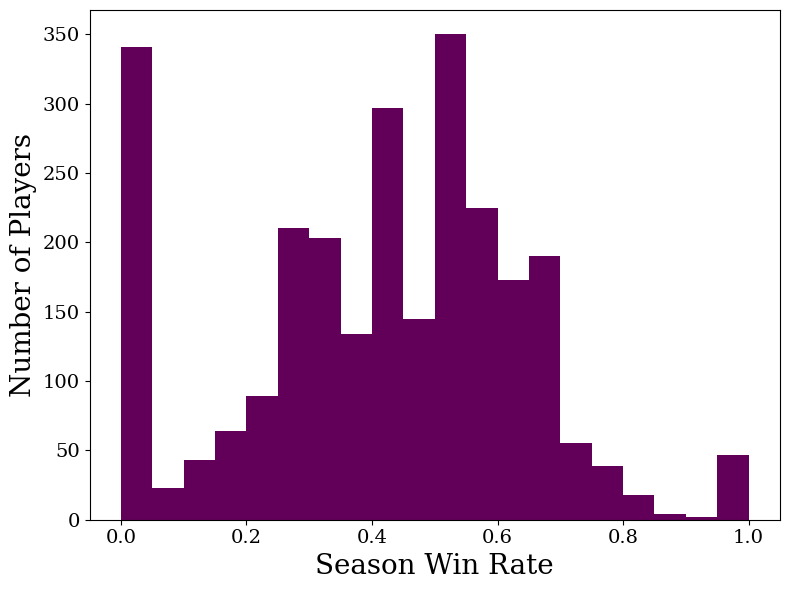

In [ ]:
wrs = []
for p in player_career_wr:
    wrs.append(player_career_wr[p][0] / player_career_wr[p][1])
wrs

plt.figure(figsize=(8, 6))
plt.hist(wrs, bins=20, color='#620059')
plt.ylabel('Number of Players', fontsize = 20)
plt.xlabel('Season Win Rate', fontsize = 20)
plt.tight_layout()
plt.savefig("playerwrs.png")
plt.show()

In [ ]:
league_champions = [
    "Aatrox", "Ahri", "Akali", "Akshan", "Alistar", "Ambessa", "Amumu", "Anivia", "Annie", "Aphelios", "Ashe",
    "Aurelion Sol", "Aurora", "Azir", "Bard", "Bel'Veth", "Blitzcrank", "Brand", "Braum", "Briar", "Caitlyn", "Camille",
    "Cassiopeia", "Cho'Gath", "Corki", "Darius", "Diana", "Dr. Mundo", "Draven", "Ekko", "Elise",
    "Evelynn", "Ezreal", "Fiddlesticks", "Fiora", "Fizz", "Galio", "Gangplank", "Garen", "Gnar",
    "Gragas", "Graves", "Gwen", "Hecarim", "Heimerdinger", "Hwei", "Illaoi", "Irelia", "Ivern", "Janna",
    "Jarvan IV", "Jax", "Jayce", "Jhin", "Jinx", "K'Sante", "Kai'Sa", "Kalista", "Karma", "Karthus",
    "Kassadin", "Katarina", "Kayle", "Kayn", "Kennen", "Kha'Zix", "Kindred", "Kled", "Kog'Maw", "LeBlanc",
    "Lee Sin", "Leona", "Lillia", "Lissandra", "Lucian", "Lulu", "Lux", "Malphite", "Malzahar",
    "Maokai", "Master Yi", "Milio", "Miss Fortune", "Mordekaiser", "Morgana", "Naafiri", "Nami",
    "Nasus", "Nautilus", "Neeko", "Nidalee", "Nilah", "Nocturne", "Nunu & Willump", "Olaf", "Orianna",
    "Ornn", "Pantheon", "Poppy", "Pyke", "Qiyana", "Quinn", "Rakan", "Rammus", "Rek'Sai", "Rell",
    "Renata Glasc", "Renekton", "Rengar", "Riven", "Rumble", "Ryze", "Samira", "Sejuani", "Senna",
    "Seraphine", "Sett", "Shaco", "Shen", "Shyvana", "Singed", "Sion", "Sivir", "Skarner", "Smolder", "Sona",
    "Soraka", "Swain", "Sylas", "Syndra", "Tahm Kench", "Taliyah", "Talon", "Taric", "Teemo",
    "Thresh", "Tristana", "Trundle", "Tryndamere", "Twisted Fate", "Twitch", "Udyr", "Urgot",
    "Varus", "Vayne", "Veigar", "Vel'Koz", "Vex", "Vi", "Viego", "Viktor", "Vladimir", "Volibear",
    "Warwick", "Wukong", "Xayah", "Xerath", "Xin Zhao", "Yasuo", "Yone", "Yorick", "Yuumi",
    "Zac", "Zed", "Zeri", "Ziggs", "Zilean", "Zoe", "Zyra"
]
champ_cols = ['pick1', 'pick2', 'pick3', 'pick4', 'pick5']

xs = []
ys = []
for index1, row in merged_result.iterrows():
    if merged_result.iloc[index1]['index'] % 12 == 11:
        x = []
        for k in range(2):
            index = merged_result.iloc[index1]['index'] - k
            comp = [df.iloc[index]['pick1'], df.iloc[index]['pick2'], df.iloc[index]['pick3'], df.iloc[index]['pick4'], df.iloc[index]['pick5']]
            bans = [df.iloc[index]['ban1'], df.iloc[index]['ban2'], df.iloc[index]['ban3'], df.iloc[index]['ban4'], df.iloc[index]['ban5']]

            for i in range(5):
                champ = comp[i]
                if index % 12 == 10:
                    for j in range(index - 10, index - 5):
                        if df.iloc[j]['champion'] == champ:
                            player = df.iloc[j]['playerid']
                            if player in player_champ_wr and champ in player_champ_wr[player]:
                                x.append(player_champ_wr[df.iloc[j]['playerid']][champ][0] / player_champ_wr[df.iloc[j]['playerid']][champ][1])
                                x.append(player_champ_wr[df.iloc[j]['playerid']][champ][1])
                            if player in player_career_wr:
                                x.append(player_career_wr[df.iloc[j]['playerid']][0] / player_career_wr[df.iloc[j]['playerid']][1])
                            if champ in champ_wr:
                                x.append(champ_wr[champ][0] / champ_wr[champ][1])
                else:
                    for j in range(index - 6, index - 1):
                        if df.iloc[j]['champion'] == champ:
                            player = df.iloc[j]['playerid']
                            if player in player_champ_wr and champ in player_champ_wr[player]:
                                x.append(player_champ_wr[df.iloc[j]['playerid']][champ][0] / player_champ_wr[df.iloc[j]['playerid']][champ][1])
                                x.append(player_champ_wr[df.iloc[j]['playerid']][champ][1])
                            if player in player_career_wr:
                                x.append(player_career_wr[df.iloc[j]['playerid']][0] / player_career_wr[df.iloc[j]['playerid']][1])
                            if champ in champ_wr:
                                x.append(champ_wr[champ][0] / champ_wr[champ][1])

            for i in range(5):
                if bans[i] not in champ_wr:
                    x.append(0.5)
                else:
                    x.append(champ_wr[bans[i]][0] / champ_wr[bans[i]][1])

        if len(x) == 50:
          xs.append([merged_result.iloc[index1]['index'] // 12, x])
          ys.append(row['result'])

0
1000
2000
3000
4000
5000
6000
7000


"\none_hot_encoded = pd.get_dummies(merged_result[champ_cols].stack()).groupby(level=0).sum()\n\n# Combine the one-hot encoded columns with the 'win' column\ndf_vectorized = pd.concat([one_hot_encoded, merged_result['result']], axis=1)\n\nprint(df_vectorized)\ndf_vectorized.loc[359]\n"

In [ ]:
import numpy as np

X_train = []
X_test = []
y_train = []
y_test = []

for i in range(len(xs)):
    if xs[i][0] in train_indices:
        X_train.append(xs[i][1])
        y_train.append(ys[i])
    else:
        X_test.append(xs[i][1])
        y_test.append(ys[i])

5196
2175


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, log_loss, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

import matplotlib.pyplot as plt

model = LogisticRegression()

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

import matplotlib.pyplot as plt

precisionLR, recallLR, _ = precision_recall_curve(y_test, y_prob)

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')
auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc}')


Accuracy: 0.95
F1 Score: 0.9481630598892803
AUC: 0.9520437373240264


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

import matplotlib.pyplot as plt
precisionRF, recallRF, _ = precision_recall_curve(y_test, y_prob)

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')
auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc}')

Accuracy: 0.95
F1 Score: 0.946258161727775
AUC: 0.9503459444547565


In [ ]:
gb_reg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)
y_prob = gb_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = gb_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

import matplotlib.pyplot as plt

precisionGB, recallGB, _ = precision_recall_curve(y_test, y_prob)
# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')
auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc}')

Accuracy: 0.95
F1 Score: 0.94662638469285
AUC: 0.9506162800796277


Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6099 - loss: 0.9620 - val_accuracy: 0.7885 - val_loss: 0.6406 - learning_rate: 0.0010
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7770 - loss: 0.6479 - val_accuracy: 0.8818 - val_loss: 0.4393 - learning_rate: 0.0010
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8664 - loss: 0.4786 - val_accuracy: 0.9195 - val_loss: 0.3540 - learning_rate: 0.0010
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8928 - loss: 0.4199 - val_accuracy: 0.9407 - val_loss: 0.3221 - learning_rate: 0.0010
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9019 - loss: 0.3871 - val_accuracy: 0.9315 - val_loss: 0.3211 - learning_rate: 0.0010
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9089 - loss: 0.3696 - val_accuracy: 0.9434 - val_loss: 0.2928 - learning_rate: 0.0010
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9226 - loss: 0.3520 

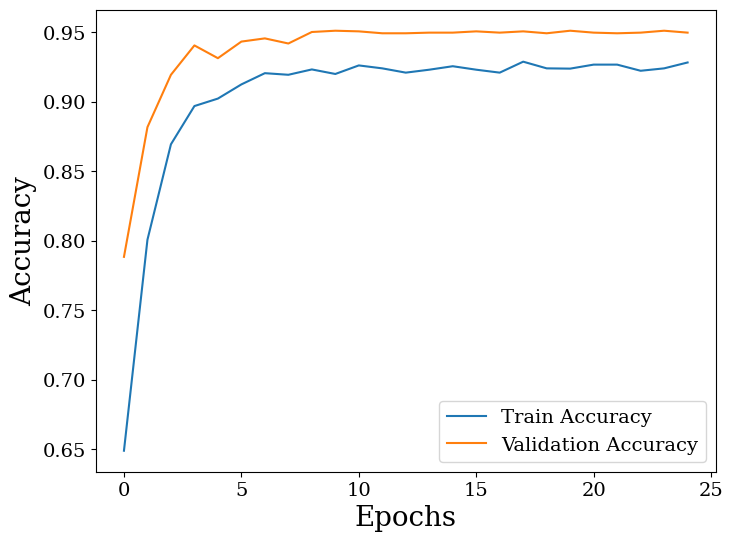

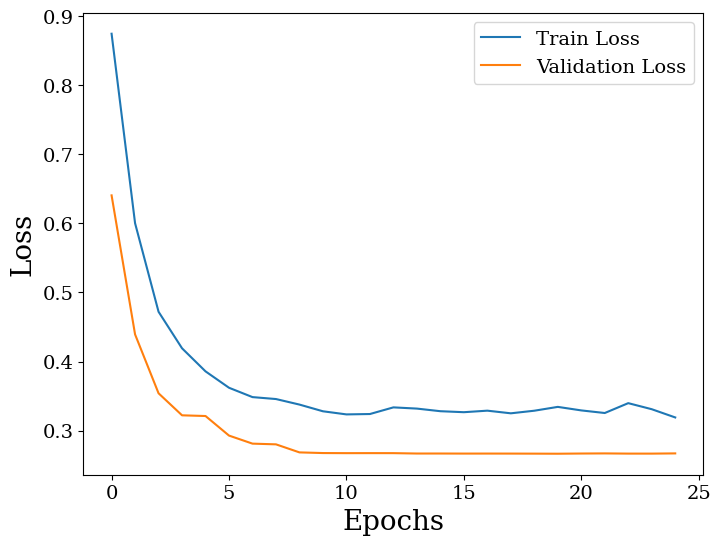

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch > 5:
        return lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(scheduler)
xs = pd.DataFrame(xs)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
def create_more_complex_model():
    model = Sequential()

    model.add(Input(shape=(X_train.shape[1],)))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Third Hidden Layer
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_more_complex_model()


early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs without improvement
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Plot accuracy
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.figure(figsize=(8, 6))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs', fontsize='20')
plt.ylabel('Accuracy', fontsize='20')
plt.legend(fontsize='14')
plt.savefig('gamevector_accuracy.png')
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs',fontsize='20')
plt.ylabel('Loss', fontsize='20')
plt.legend(fontsize='14')
plt.savefig('gamevector_loss.png')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precisionNN, recallNN, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot the precision-recall curve

# Compute ROC-AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.2f}")

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1 Score: 0.95
AUC: 0.99


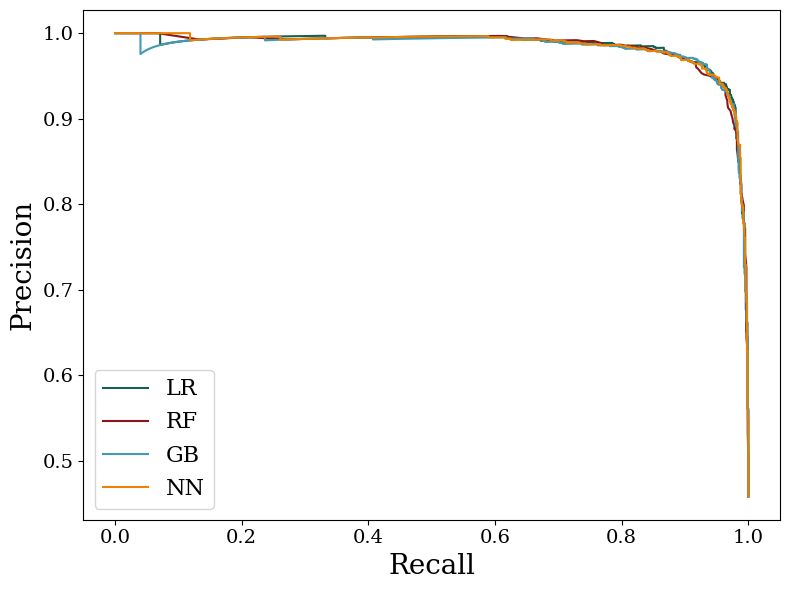

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.figure(figsize=(8, 6))
plt.plot(recallLR, precisionLR, label='LR', color='#175E54')
plt.plot(recallRF, precisionRF, label='RF', color='#8C1515')
plt.plot(recallGB, precisionGB, label='GB', color='#4298B5')
plt.plot(recallNN, precisionNN, label='NN', color='#E98300')


plt.xlabel('Recall', fontsize='20')
plt.ylabel('Precision', fontsize='20')
plt.legend(fontsize='16')
plt.tight_layout()
plt.savefig('gamevector.png')
plt.show()